# Spot checking outliers from the Rapid Rotator Sample

July 11, 2022  
Gully & Ryan H.

The goal of this notebook is to identify and understand some of the outliers from the rapid rotator set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightkurve as lk
import astropy.units as u

sns.set_context('notebook', font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Compare harmonous outlier

In [28]:
name = 'EPIC 202059229'

tess_lc = lk.search_lightcurve(name, mission='TESS').download()
k2_lc = lk.search_lightcurve(name, author='EVEREST').download()

tess_lc = tess_lc.remove_nans().remove_outliers()
k2_lc = k2_lc.remove_nans().remove_outliers()

C:\Users\txrya\miniconda3\envs\contracosta\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


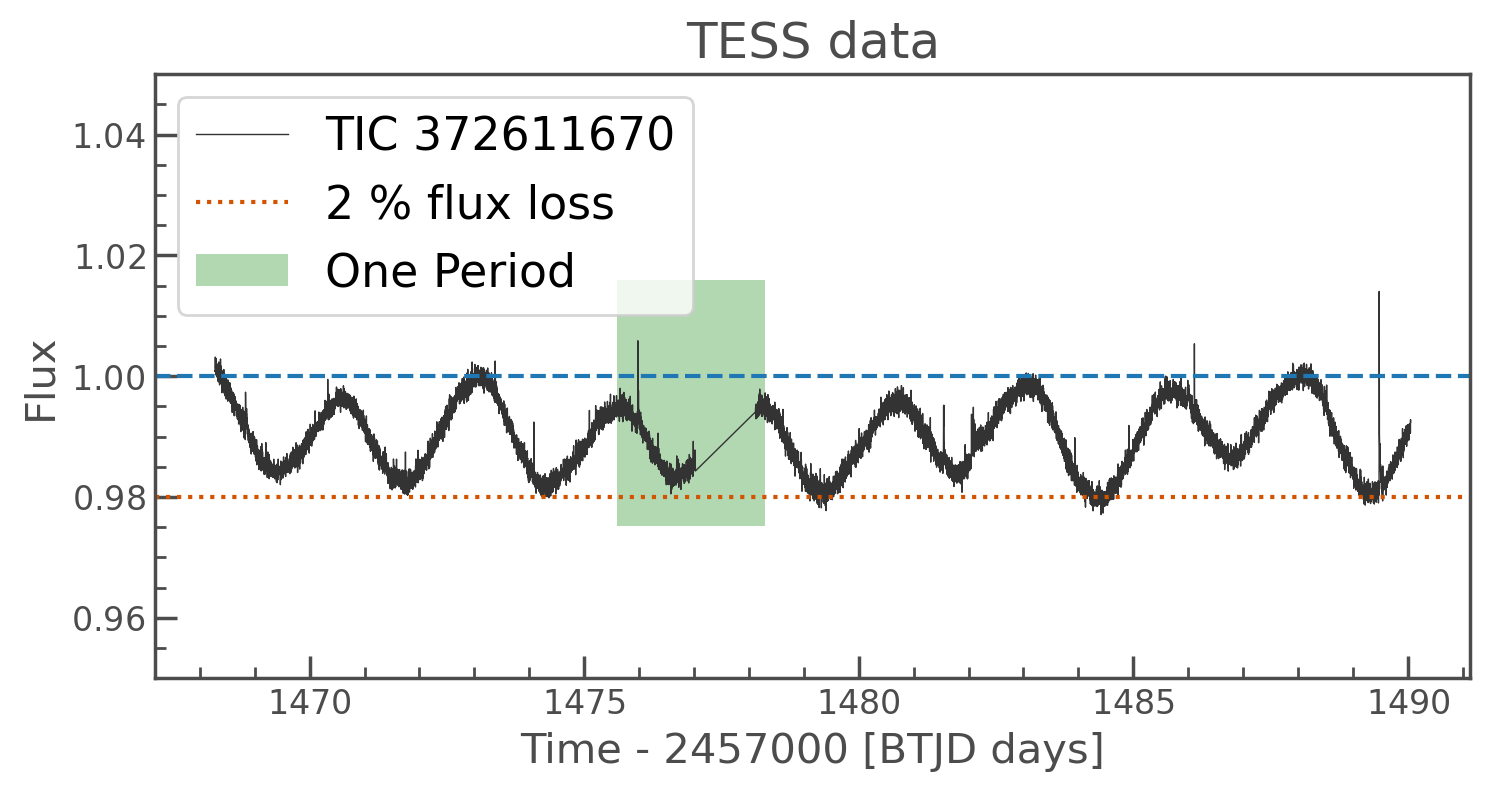

In [29]:
scalar = np.percentile(tess_lc.flux, 98)
tess_lc = tess_lc/scalar
ax = tess_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.98, linestyle='dotted', color='#d35400', label='2 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 1475.6, 1478.3, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('TESS data')
ax.set_ylim(0.95, 1.05)

ax.legend()

Tess period is about 2.7 days

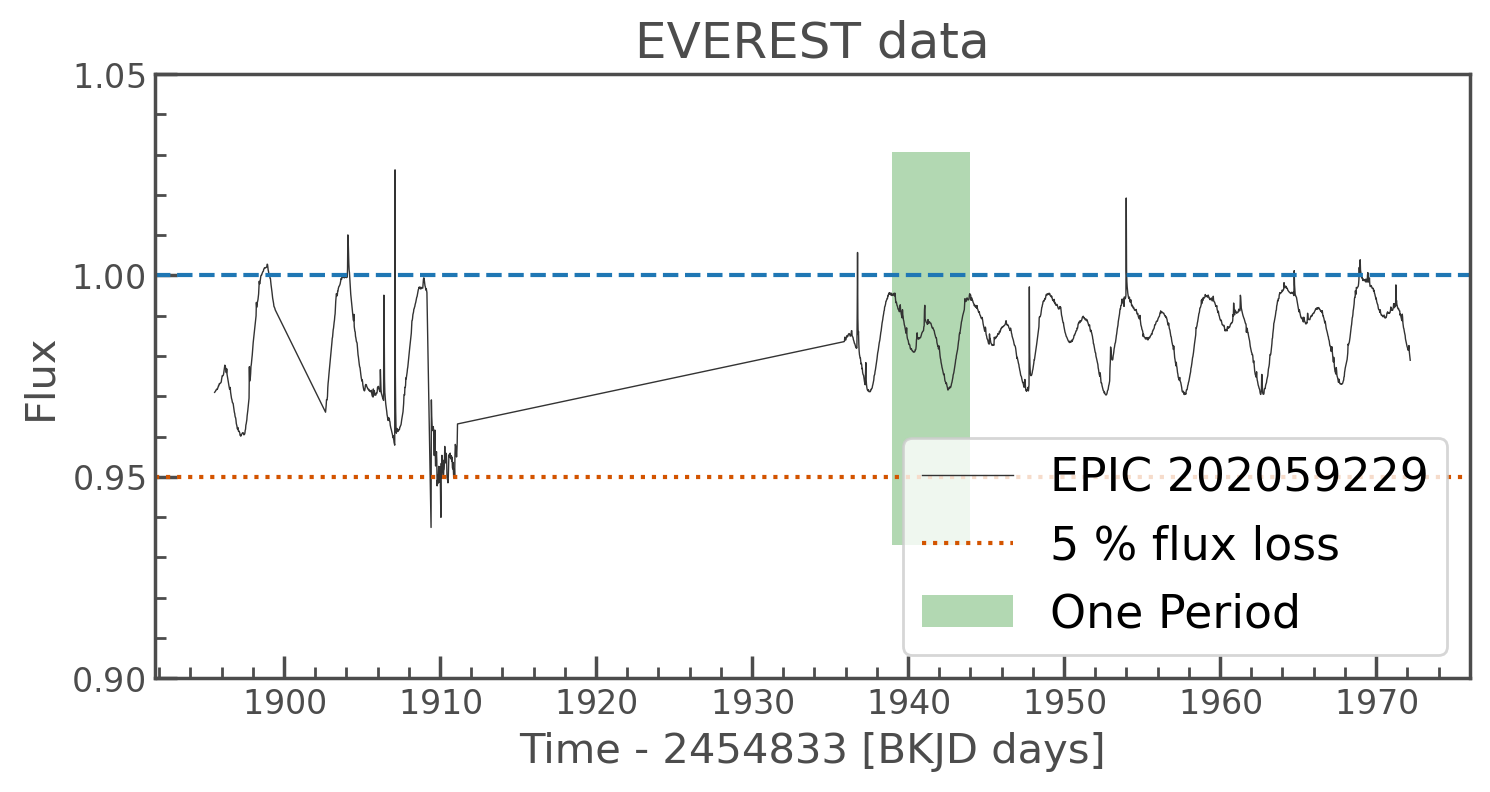

In [30]:
scalar = np.percentile(k2_lc.flux, 98)
k2_lc = k2_lc/scalar
ax = k2_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.95, linestyle='dotted', color='#d35400', label='5 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 1939, 1944, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('EVEREST data')
ax.set_ylim(0.9, 1.05)
ax.legend()

Kepler period is about 5 days

#### Compare with computer prediction

C:\Users\txrya\miniconda3\envs\contracosta\lib\site-packages\astropy\units\quantity.py:613: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

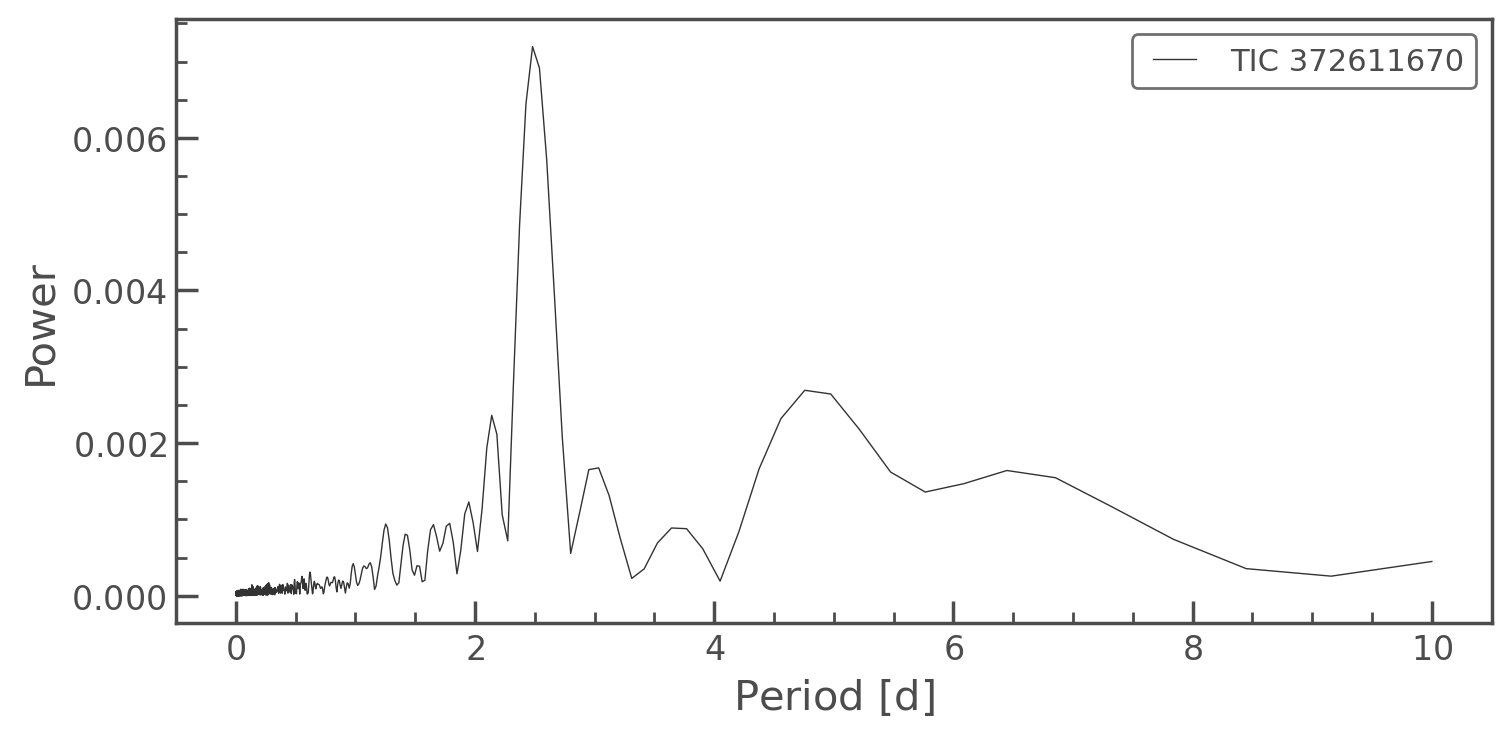

In [32]:
tess_pg = tess_lc.to_periodogram(maximum_period=10)
tess_pg.plot(view='period')

In [6]:
tess_pg.period_at_max_power

<Quantity 2.47414223 d>

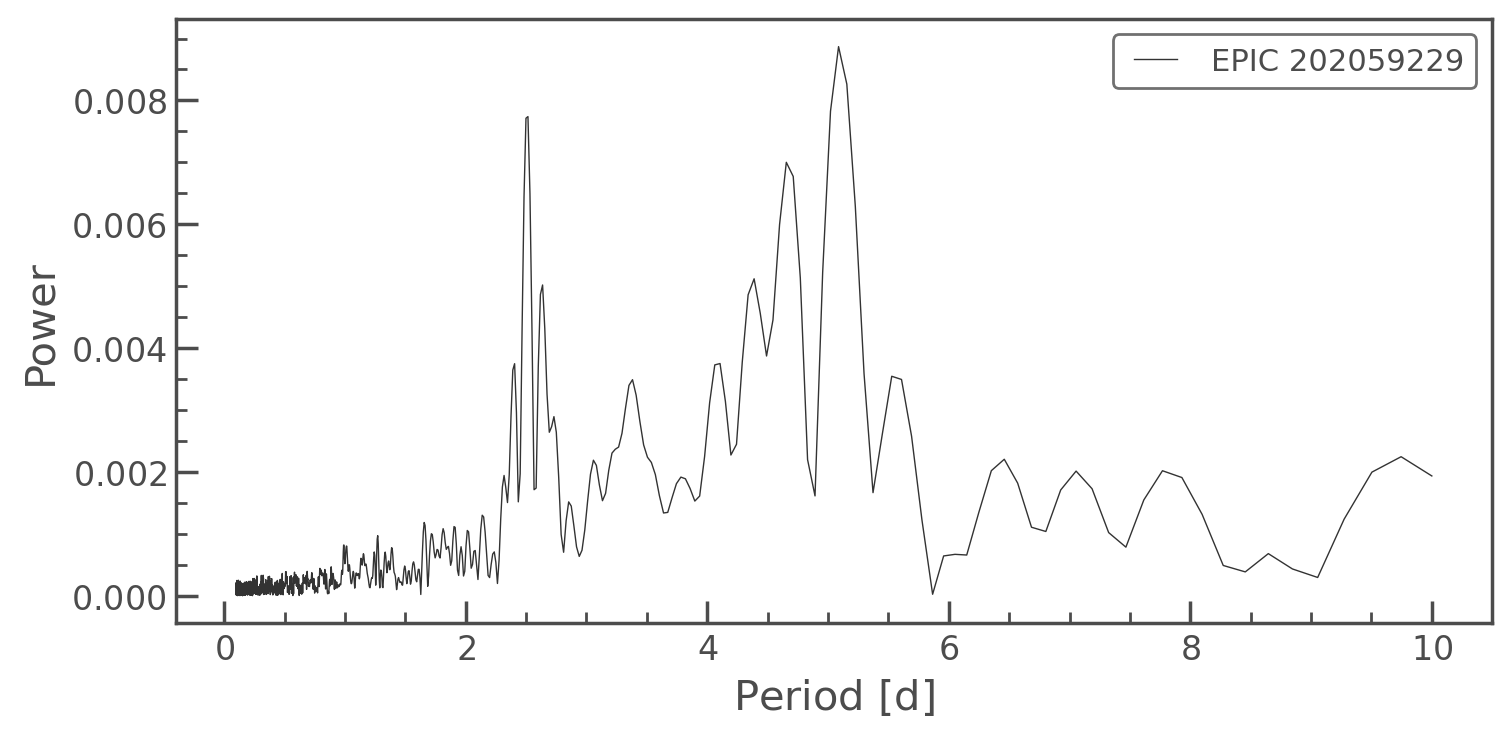

In [7]:
k2_pg = k2_lc.to_periodogram(minimum_period=.1, maximum_period=10)
ax = k2_pg.plot(view='period')

In [8]:
k2_pg.period_at_max_power

<Quantity 5.08761719 d>

## Compare Outlier

In [9]:
name = 'EPIC 249148667'

tess_lc = lk.search_lightcurve(name, mission='TESS').download()
k2_lc = lk.search_lightcurve(name, author='EVEREST').download()

tess_lc = tess_lc.remove_nans().remove_outliers()
k2_lc = k2_lc.remove_nans().remove_outliers()

C:\Users\txrya\miniconda3\envs\contracosta\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


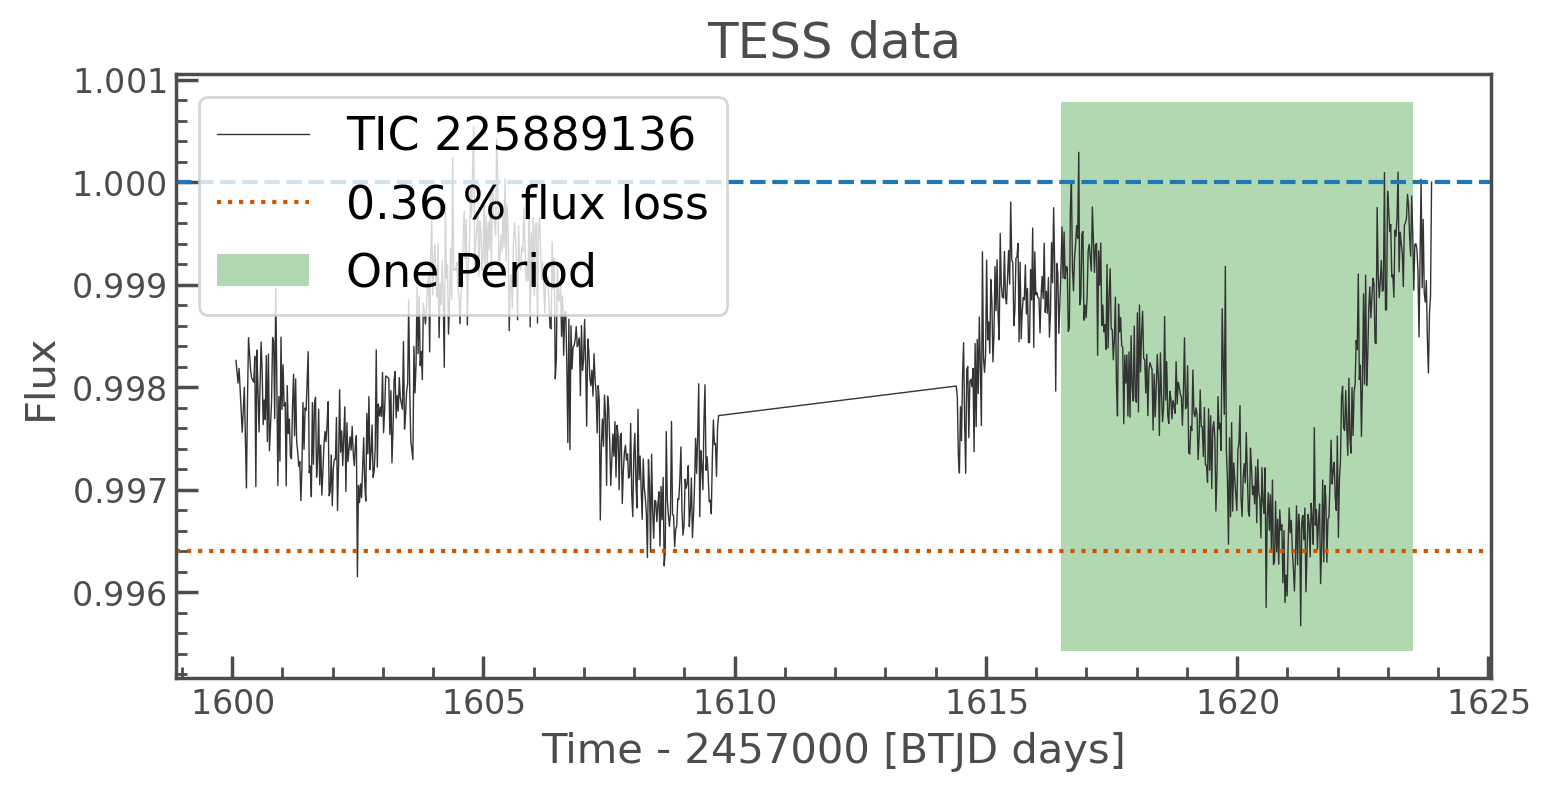

In [10]:
scalar = np.percentile(tess_lc.flux, 99)
tess_lc = tess_lc/scalar
ax = tess_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.9964, linestyle='dotted', color='#d35400', label='0.36 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 1616.5, 1623.5, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('TESS data')

ax.legend(loc='upper left')

TESS period is about 7 days

In [11]:
tess_lc.to_periodogram().period_at_max_power

<Quantity 6.26105341 d>

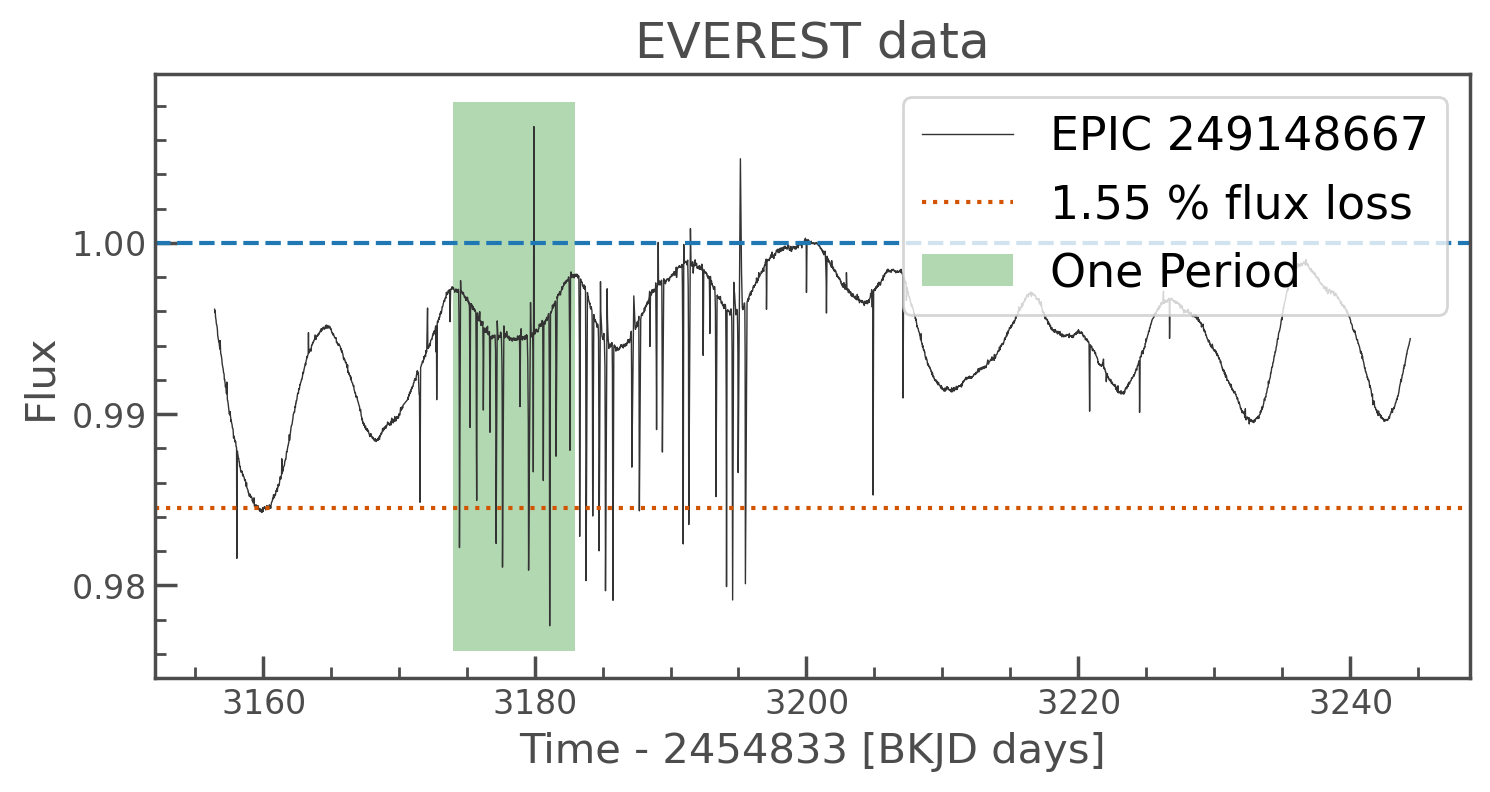

In [12]:
scalar = np.percentile(k2_lc.flux, 99)
k2_lc = k2_lc/scalar
ax = k2_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.9845, linestyle='dotted', color='#d35400', label='1.55 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 3174, 3183, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('EVEREST data')

ax.legend(loc='upper right')

Kepler period is about 9 days

In [13]:
k2_lc.to_periodogram().period_at_max_power

<Quantity 439.99969851 d>

The problem with the above period is that the outliers (such as the spacecraft moving/repositioning or background noise from other objects) in the graph are causing the lightcurve program to misinterpret the data. If you look below, you will see that when we set the maximum period allowed to be 10; lightcurve accurately calculates the period.

In [14]:
k2_lc.to_periodogram(maximum_period=10).period_at_max_power

<Quantity 9.16666614 d>

## Compare Outlier

In [15]:
name = 'EPIC 201264115'

tess_lc = lk.search_lightcurve(name, mission='TESS').download()
k2_lc = lk.search_lightcurve(name, author='EVEREST').download()

tess_lc = tess_lc.remove_nans().remove_outliers()
k2_lc = k2_lc.remove_nans().remove_outliers()

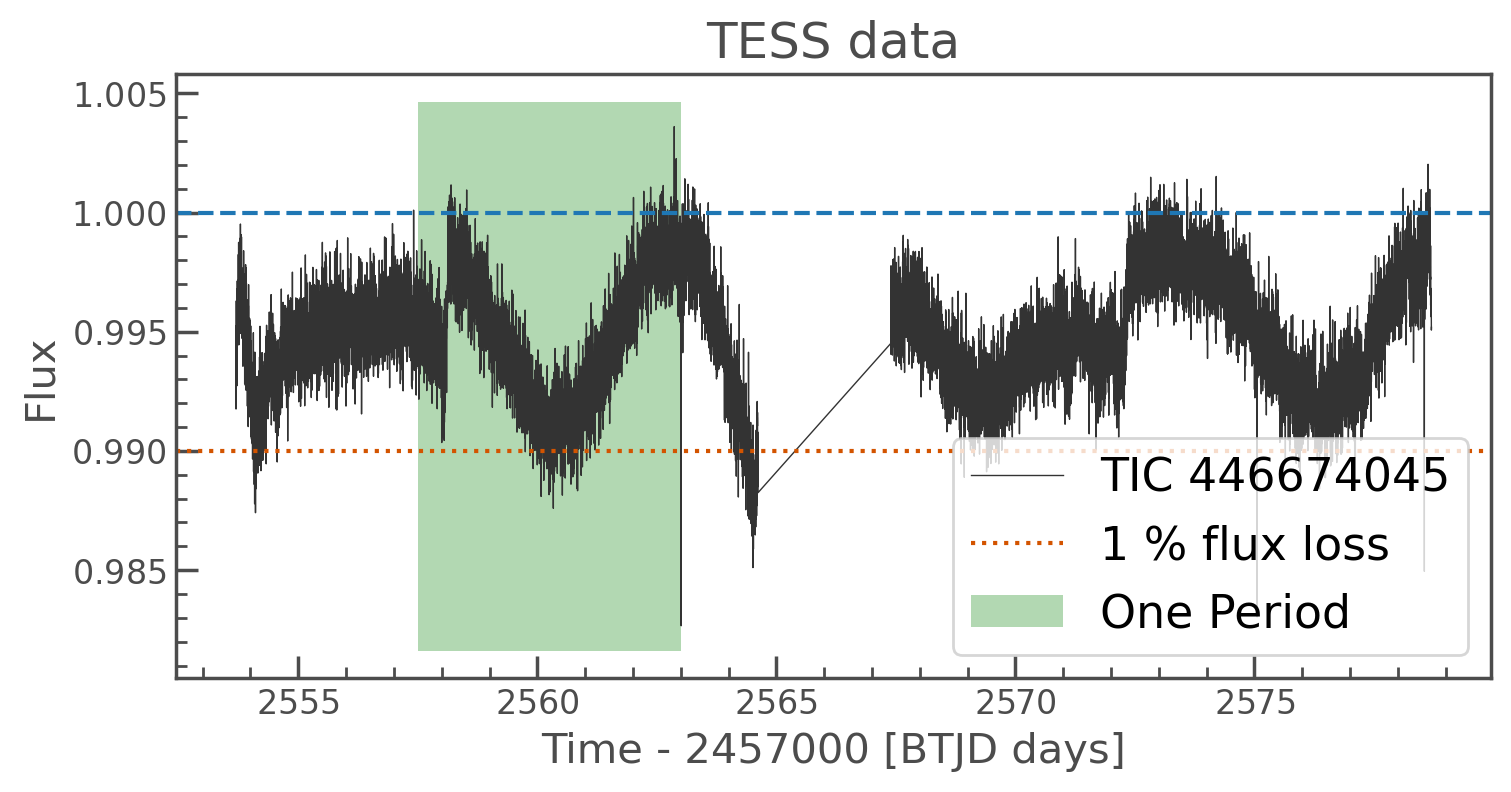

In [16]:
scalar = np.percentile(tess_lc.flux, 99)
tess_lc = tess_lc/scalar
ax = tess_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.99, linestyle='dotted', color='#d35400', label='1 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 2557.5, 2563, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('TESS data')

ax.legend(loc='lower right')

TESS period is about 5.5 days

In [17]:
tess_lc.to_periodogram().period_at_max_power

<Quantity 5.436532 d>

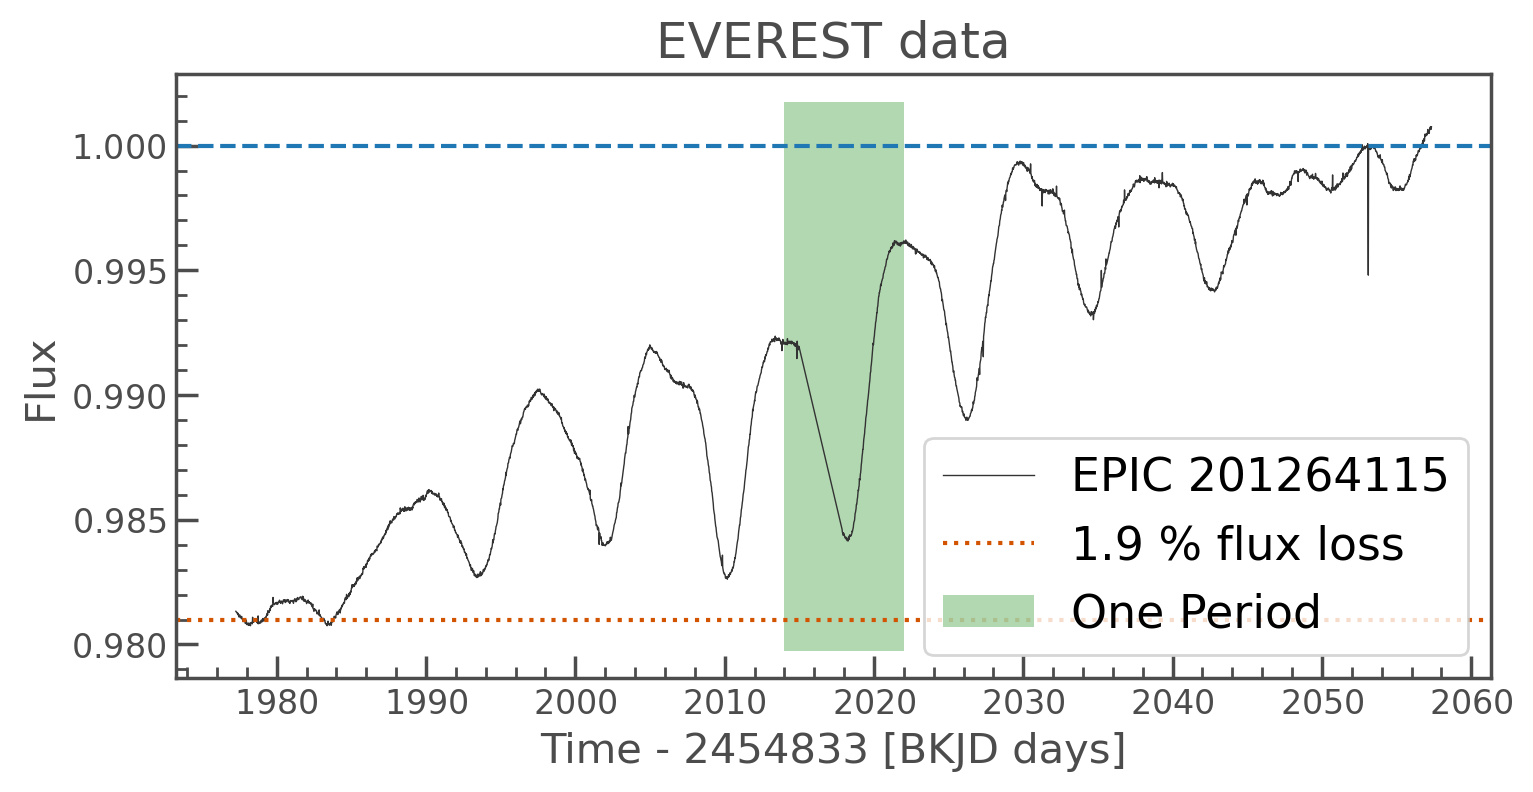

In [18]:
scalar = np.percentile(k2_lc.flux, 99)
k2_lc = k2_lc/scalar
ax = k2_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.981, linestyle='dotted', color='#d35400', label='1.9 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 2014, 2022, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('EVEREST data')

ax.legend(loc='lower right')

Kepler period is about 8 days

In [19]:
k2_lc.to_periodogram().period_at_max_power

<Quantity 400.36231687 d>

The same issue as the previous outlier happens here. If we do not include a maximum period check, lightcurve can sometimes mess up and overestimate the period.

In [20]:
k2_lc.to_periodogram(maximum_period=10).period_at_max_power

<Quantity 8.16462243 d>

## Compare Outlier

In [34]:
name = 'EPIC 201636027'

tess_lc = lk.search_lightcurve(name, mission='TESS').download()
k2_lc = lk.search_lightcurve(name, author='EVEREST').download()

tess_lc = tess_lc.remove_nans().remove_outliers()
k2_lc = k2_lc.remove_nans().remove_outliers()

C:\Users\txrya\miniconda3\envs\contracosta\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


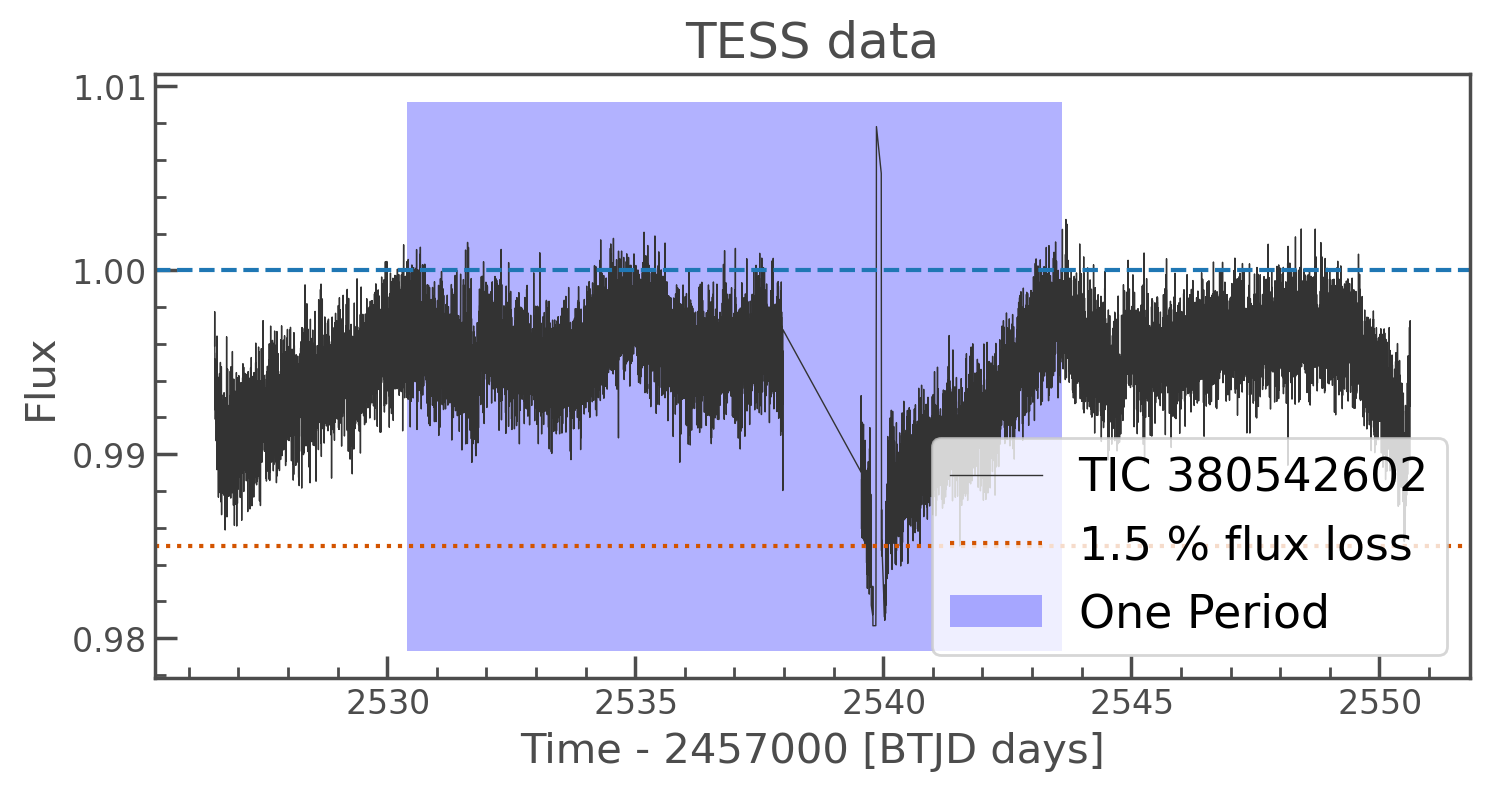

In [35]:
scalar = np.percentile(tess_lc.flux, 99)
tess_lc = tess_lc/scalar
ax = tess_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.985, linestyle='dotted', color='#d35400', label='1.5 % flux loss')

# ax.fill_betweenx(ax.get_ylim(), 2530, 2535, facecolor='green', alpha=0.3, label='One Period')
ax.fill_betweenx(ax.get_ylim(), 2530.4, 2543.6, facecolor='blue', alpha=0.3, label='One Period')

ax.set_title('TESS data')

ax.legend(loc='lower right')

TESS period is about 13 days

In [36]:
tess_lc.to_periodogram().period_at_max_power

<Quantity 13.39010365 d>

While the graph looks like it have a period of around 5 days, it actually has a period of around 13, as seen below in the periodogram.

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

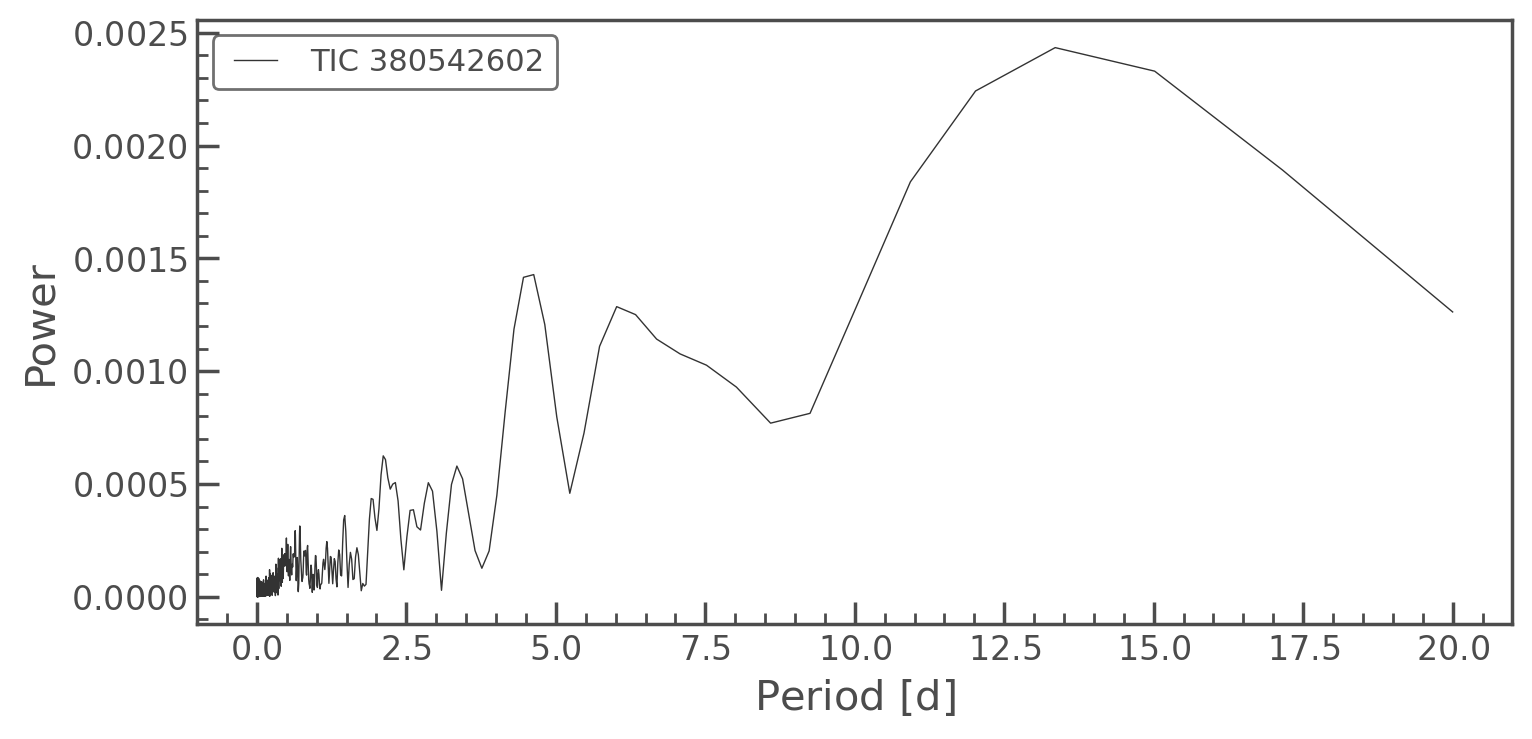

In [37]:
tess_lc.to_periodogram(maximum_period=20).plot(view='period')

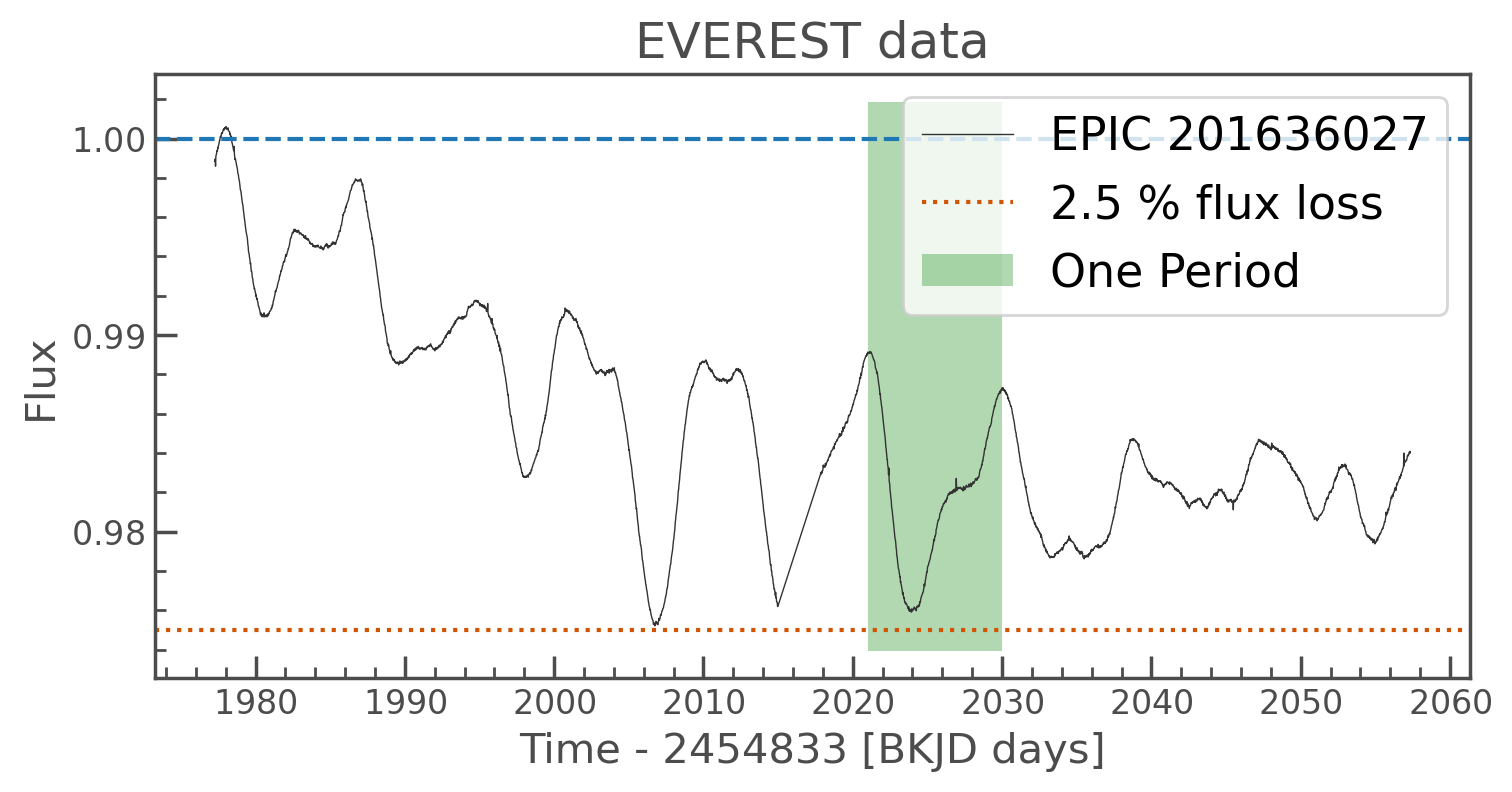

In [43]:
scalar = np.percentile(k2_lc.flux, 99)
k2_lc = k2_lc/scalar
ax = k2_lc.plot()

ax.axhline(1.0, linestyle='dashed')
ax.axhline(0.975, linestyle='dotted', color='#d35400', label='2.5 % flux loss')

ax.fill_betweenx(ax.get_ylim(), 2021, 2030, facecolor='green', alpha=0.3, label='One Period')

ax.set_title('EVEREST data')

ax.legend(loc='upper right')

Kepler period is about 9 days

In [39]:
k2_lc.to_periodogram().period_at_max_power

<Quantity 400.36134622 d>

<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

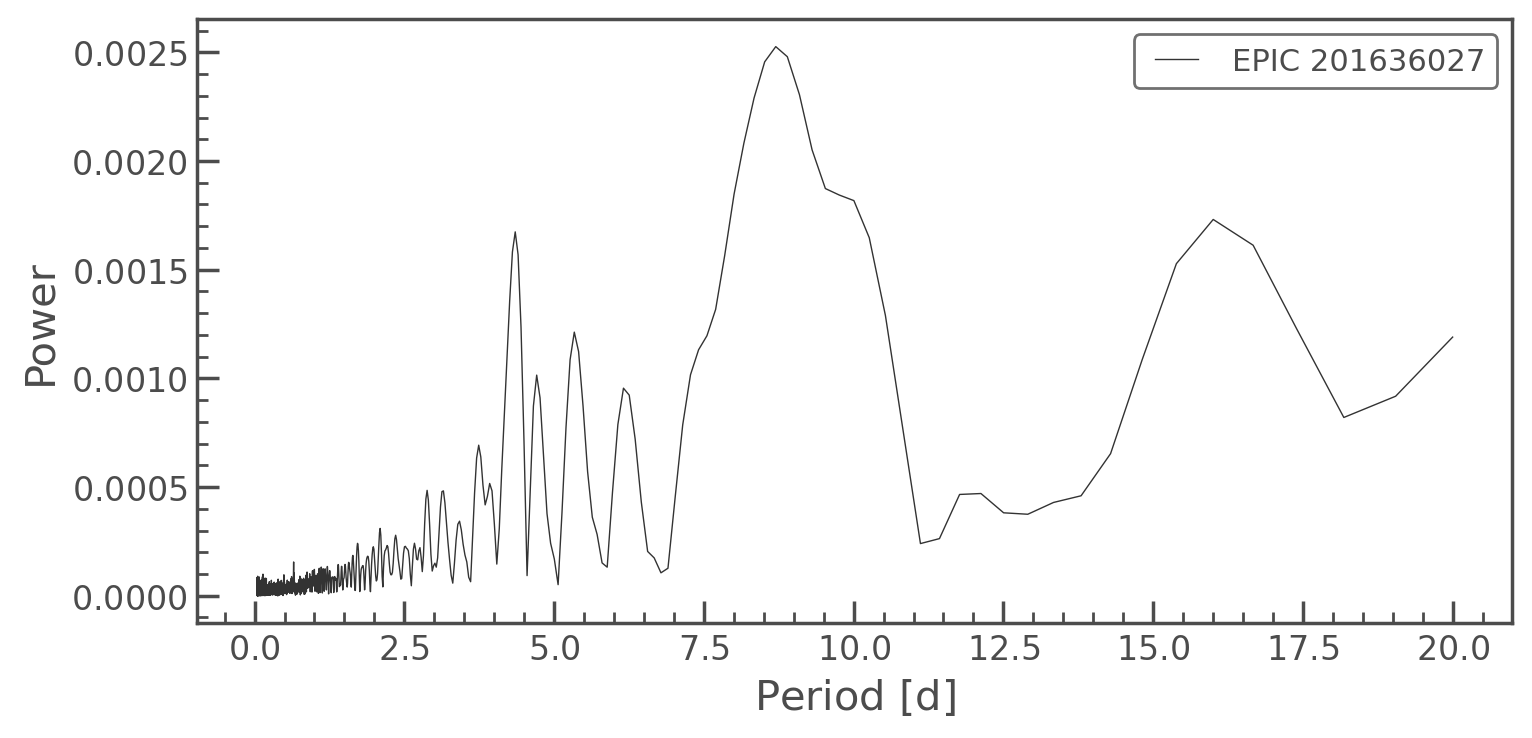

In [40]:
k2_lc.to_periodogram(maximum_period=20).plot(view='period')

In [41]:
k2_lc.to_periodogram(maximum_period=20).period_at_max_power

<Quantity 8.70009041 d>